# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)


# Importando dados e bibliotecas


## Importando principais bibliotecas e os dados


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

In [4]:
feature_names = np.array(dataset.columns)
n_input_features = len(feature_names) - 1
print(", ".join(feature_names))

Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class


## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 70%, 30% e 0%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino serão treinados separadamente dos dados de teste em uma instância `sm_train` da classe `SMOTE` do pacote `imblearn.over_sampling`.


In [5]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 70%-30%-0%
train_size_nf = int(n_examples_nf*0.7)
test_size_nf = n_examples_nf - train_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf:],y_nf[train_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 70%-30%-0%
train_size_f = int(n_examples_f*0.7)
test_size_f = n_examples_f - train_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_test,y_f_test = X_f[train_size_f:],y_f[train_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
test_size = len(y_test)
n_examples = train_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Mudança de escala para facilitar o treinamento
sc_y = MinMaxScaler()

X_train_sc = sc_y.fit_transform(X_train)
X_test_sc = sc_y.transform(X_test)

# Modelos de Classificação

Nesta primeira abordagem utilizaremos modelos simples para previsão de fraudes, escolhidos através de validação cruzada com escolha aleatória dos hiperparâmetros, com a classe `RandomizedSearchCV()` do `sklearn.model_selection`.

Utilizamos a classe `SGDClassifier` do pacote `sklearn` para classificar os dados. Basicamente este modelo realiza a previsão das classe com classificadores lineares, treinando com métodos estocásticos. Esta classe possui os seguintes hiperparâmetros:

- `alpha`: este é um parâmetro de regularização que controla o peso das penalidades. A distribuição utilizada na escolha aleatória deste hiperparâmetro é `loguniform(1e-4,1e1)`.

- `penalty`: este é um parâmetro de regularização que controla o tipo de penalidade. Os hiperparâmetros escolhidos com probabilidade uniforme são `('l1','l2')`.

- `loss`: este é um parâmetro que controla o tipo de classificação. Aqui essencialmente utilizaremos dois parâmetros para definir modelos separados, que são os seguintes:

  - `'hinge'`: este tipo de _loss_ define o modelo SVM estocástico. Ou seja, estamos de certa forma tentando maximizar a separação entre as classes, porém por ser estocástico tem a vantagem de possuir um treinamento mais rápido e também ser menos propenso à _overfitting_, pelo fato de que não utilizar todos os dados de treino ao mesmo tempo.

  - `'log'`: este tipo de _loss_ define o modelo de regressão logística com treinamento estocástico. Neste caso o treinamento tenta deixar as distribuições de probabilidades preditas mais próximas aos valores reais.


In [7]:
# Save performance
import json


# Distribuições
from scipy.stats import loguniform


# Modelos
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Barra de progresso
from tqdm import tqdm

# Seleção de modelos
from sklearn.model_selection import RandomizedSearchCV


# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})






# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(f'\n{s}')
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                    'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)
with open("performance/performance_supervised.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]


SGD SVM


 50%|█████     | 1/2 [01:11<01:11, 71.69s/it]


SGD LR


100%|██████████| 2/2 [02:18<00:00, 69.20s/it]



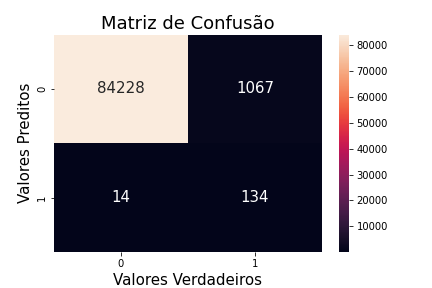
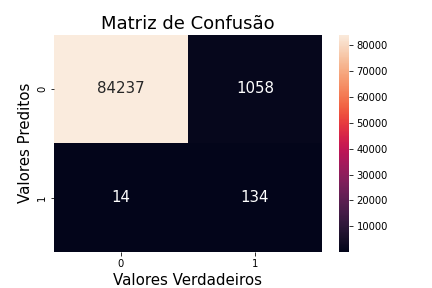

In [8]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Test',)
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
      html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test1.html','w',encoding='utf-8') as f:
  f.write(html)

In [39]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]

n_examples = len(y)
indices = np.array(range(n_examples))

sample_size = int(0.5*n_examples)
idx = np.random.choice(indices,size=sample_size,replace=False)

X_sample = X[idx,:]
y_sample = y[idx,:]

# Rebalanceando os dados de treino e validação
sm_shap_sample = SMOTE(sampling_strategy='minority',random_state=42)

X_sample,y_sample = sm_train.fit_resample(X_sample,y_sample)

# Definindo o tamanho da amostra 
sample_size = len(y_sample)


X_sample_sc = sc_y.transform(X_sample)

In [43]:
import shap

model = Best_model["SGD LR"]

X_sc = np.concatenate((X_train_sc,X_test_sc))


# Shap Values
explainer = shap.LinearExplainer(model,X_train_sc)
shap_values = explainer.shap_values(X_sample_sc)

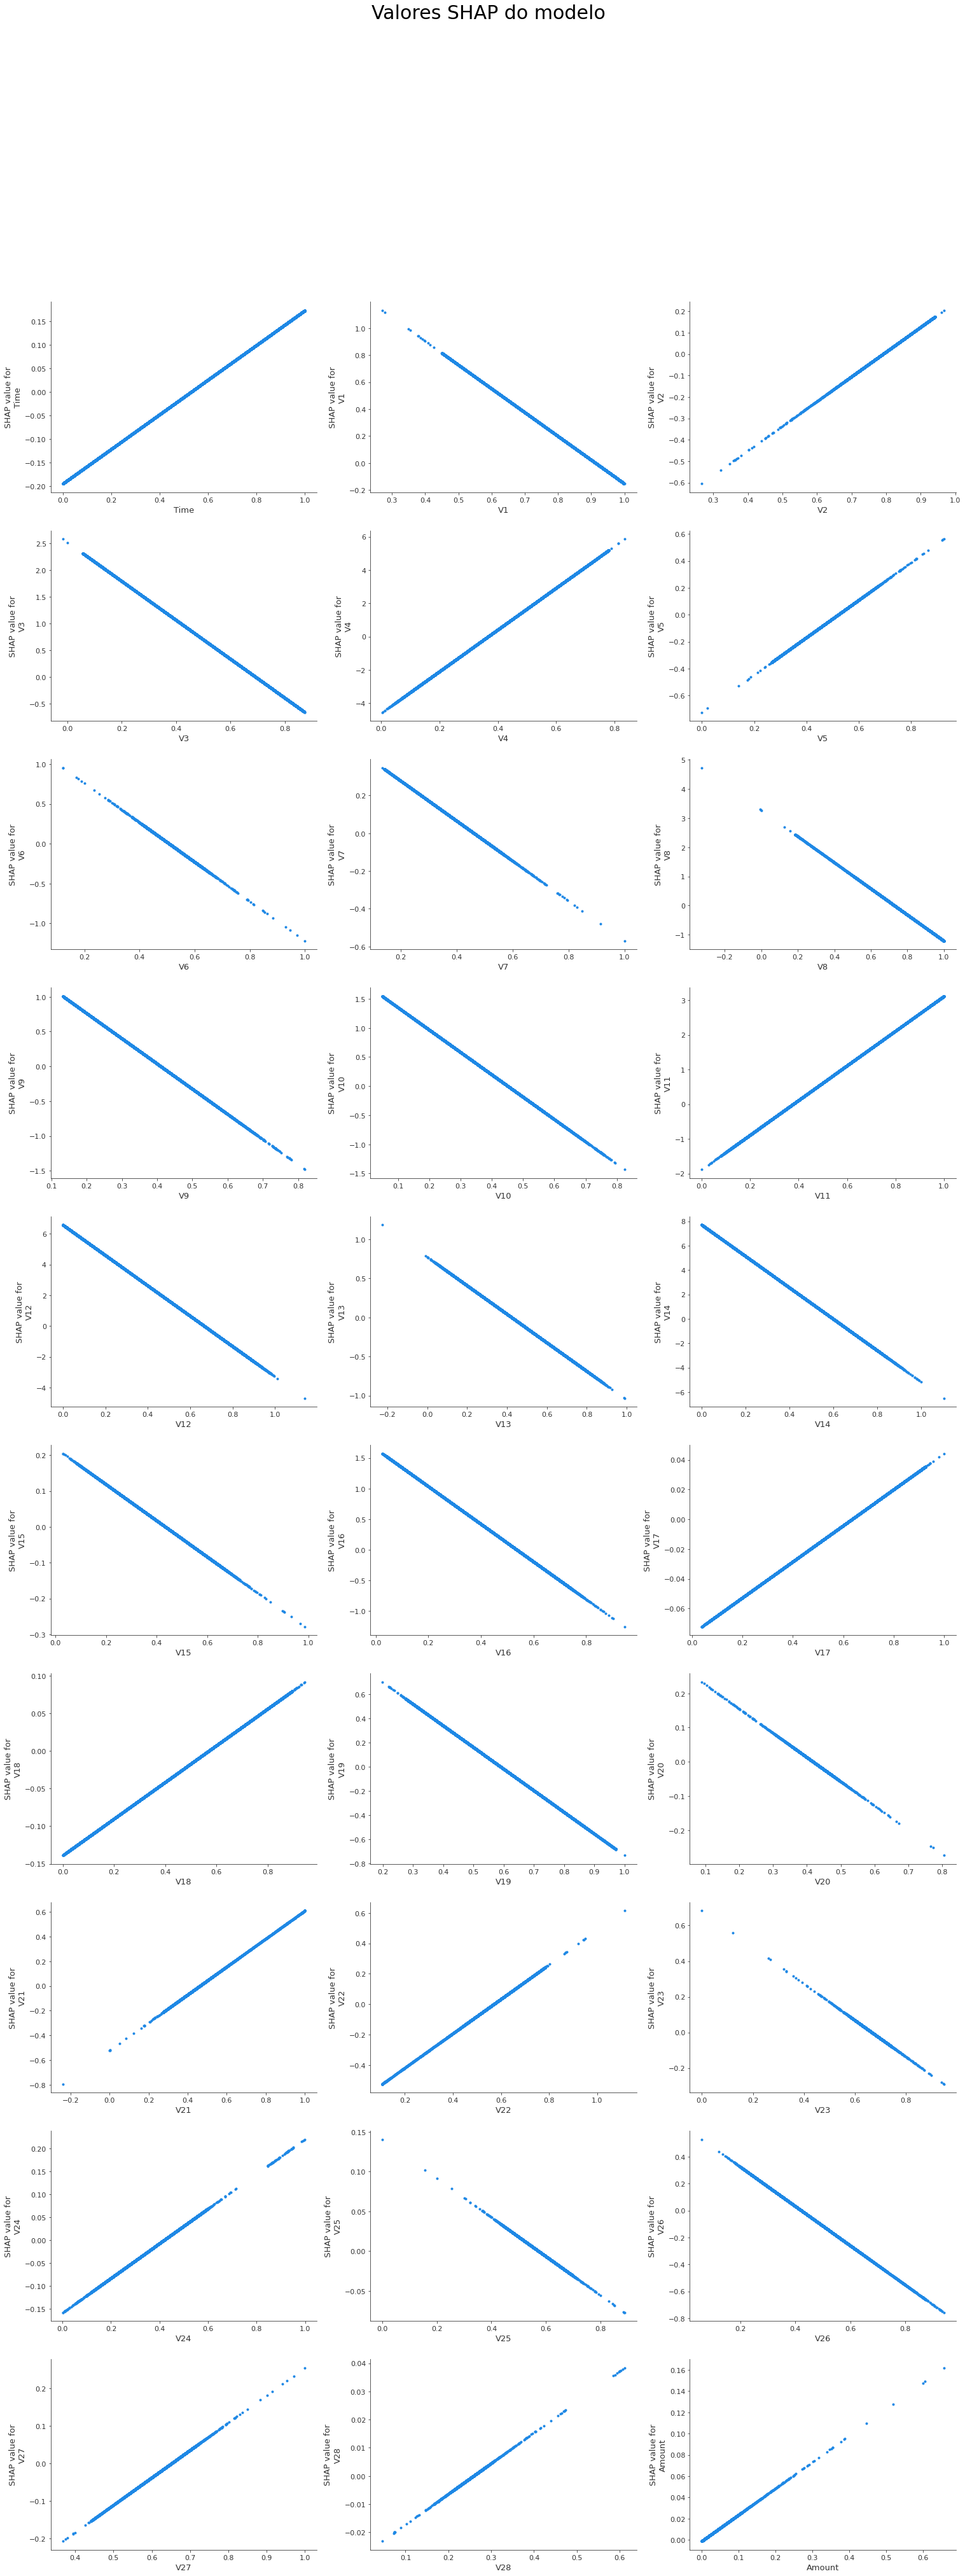

In [44]:
ncols = 3

nrows = (n_input_features//ncols) + 1 if n_input_features%ncols>0 else (n_input_features//ncols)

# Plotando os shap_values
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)



axes = axes.ravel()

fig.set_figheight(6.5*nrows)
fig.set_figwidth(8.5*ncols)

for i,feature in enumerate(feature_names[:-1]):
    axis = axes[i]
    shap.dependence_plot(i, shap_values, X_sample_sc, feature_names = feature_names[:-1], show = False, ax = axis, interaction_index = None)
    
fig.suptitle("Valores SHAP do modelo",fontsize=30)
# fig.savefig('figure/shap_dependence.pdf')
plt.show()

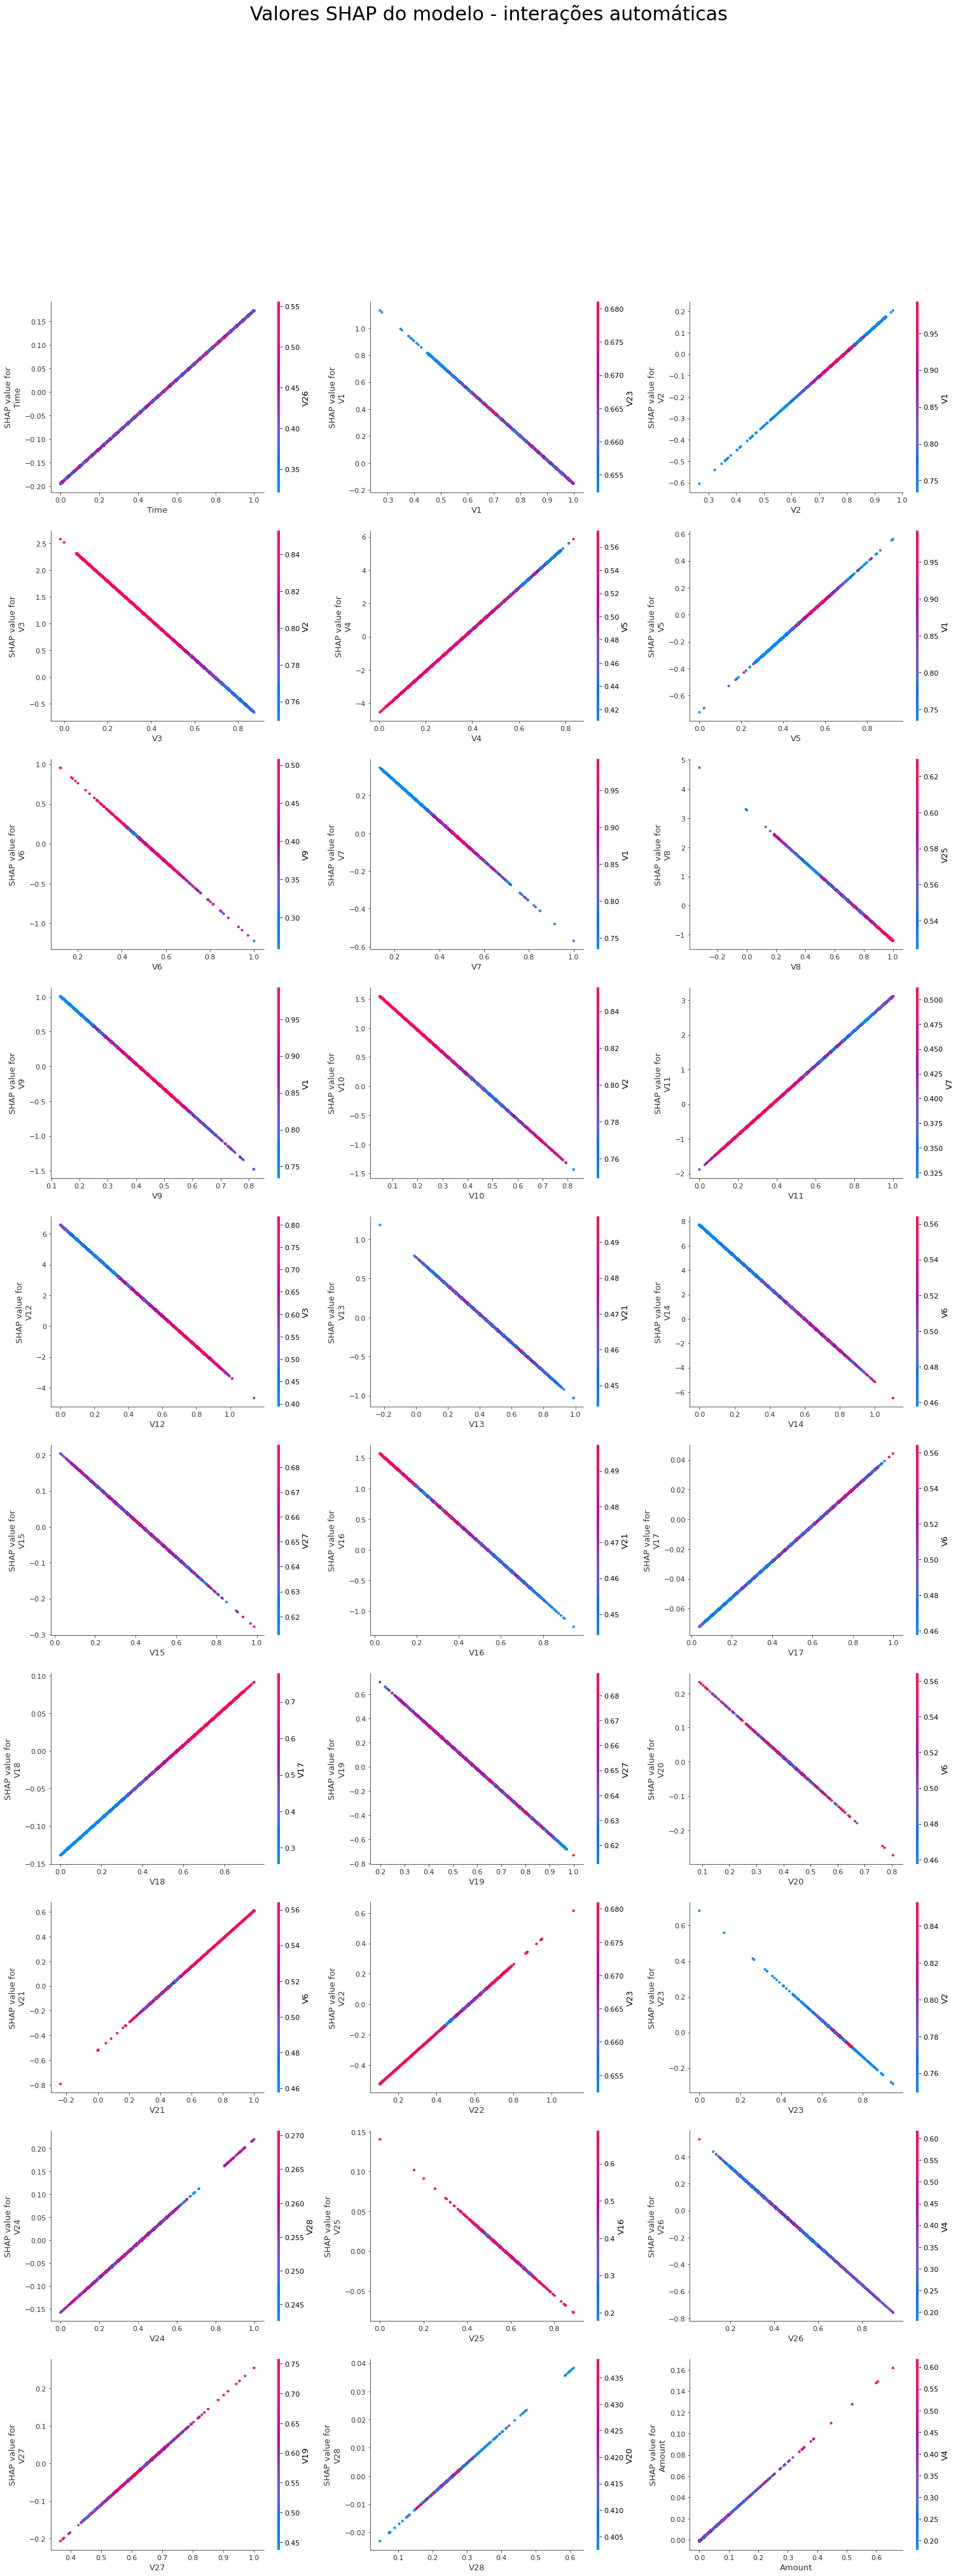

In [49]:
ncols = 3



nrows = (n_input_features//ncols) + 1 if n_input_features%ncols>0 else (n_input_features//ncols)

# Plotando os shap_values com interações
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)


axes = axes.ravel()

fig.set_figheight(6.5*nrows)
fig.set_figwidth(8.5*ncols)

for i,feature in enumerate(feature_names[:-1]):
    axis = axes[i]
    shap.dependence_plot(i, shap_values, X_sample_sc, feature_names = feature_names[:-1], show = False, ax = axis, interaction_index = 'auto')

fig.suptitle("Valores SHAP do modelo - interações automáticas",fontsize=30)
# fig.savefig('figure/shap_dependence_interaction.pdf')
plt.show()

In [55]:
# Shap Values
explainer = shap.LinearExplainer(model,X_train_sc,feature_names=feature_names[:-1])
shap_values = explainer(X_sample_sc)

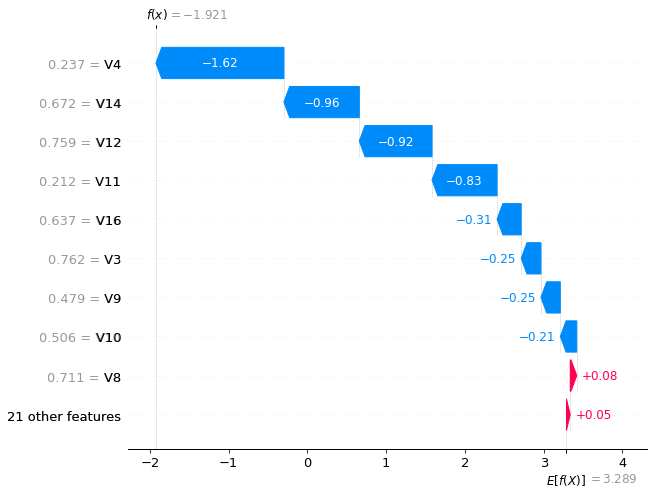

In [56]:
idx = 327


fig = plt.figure()

fig.set_alpha(0.5)

ax = fig.add_axes([0.1,0.1,0.9,0.9])

fig.patch.set_alpha(1)

shap.plots.waterfall(shap_values=shap_values[idx])
# fig.savefig('figure/shap_value_sample1.pdf')

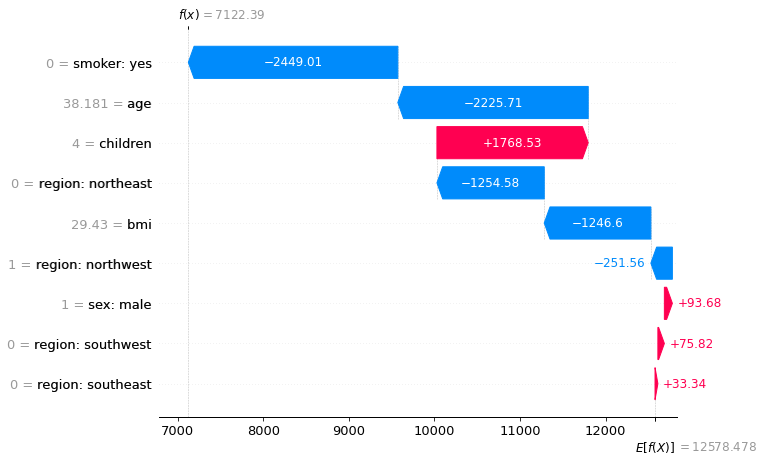

In [ ]:
idx = 442


fig = plt.figure()

fig.set_alpha(0.5)

ax = fig.add_axes([0.1,0.1,0.9,0.9])

fig.patch.set_alpha(1)

shap.plots.waterfall(shap_values=shap_values[idx])
# fig.savefig('figure/shap_value_sample2.pdf')

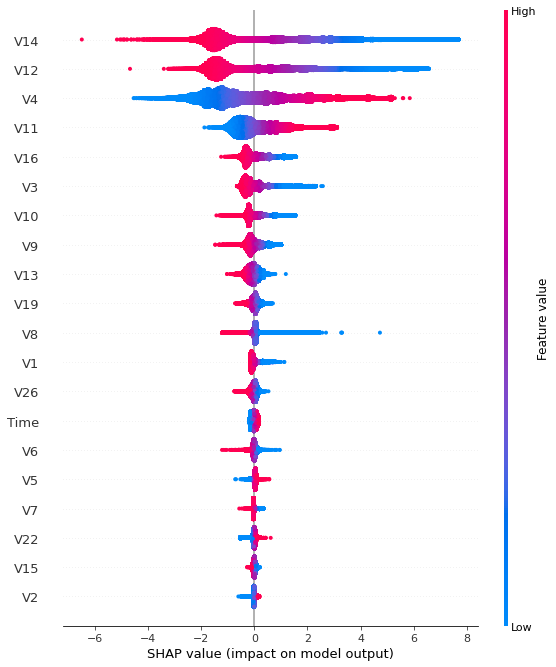

In [58]:
fig = plt.figure()

fig.set_alpha(0.5)

ax = fig.add_axes([0.1,0.1,0.9,0.9])

fig.patch.set_alpha(1)

shap.summary_plot(shap_values=shap_values)
# fig.savefig('figure/shap_value_sample2.pdf')

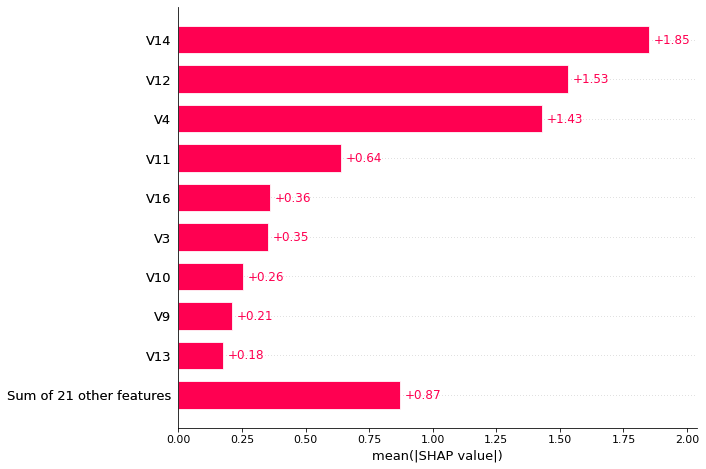

In [59]:
fig = plt.figure()

fig.set_alpha(0.5)

ax = fig.add_axes([0.1,0.1,0.9,0.9])

fig.patch.set_alpha(1)

shap.plots.bar(shap_values=shap_values)
# fig.savefig('figure/shap_value_sample2.pdf')

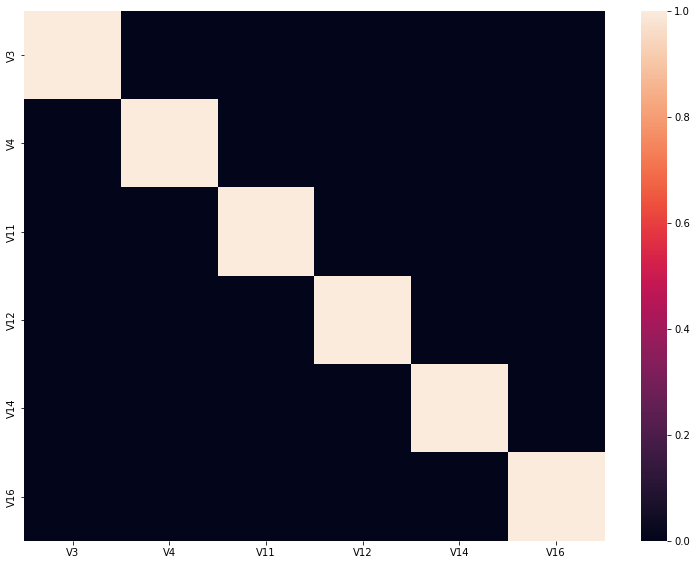

Selected Features:
V3, V4, V11, V12, V14, V16


In [91]:
avg_impact = abs(shap_values.values).mean(axis=0)
features_selected = np.where(avg_impact - avg_impact.mean()>=0)[0]

feature_names_selected = feature_names[features_selected]

df_features = dataset.iloc[:,features_selected]

# Verificando as correlações
fig = plt.figure(figsize=(6.5*2,6.5*1.5))
fig.patch.set_alpha(1.0)
sns.heatmap(df_features.corr())
plt.show()

X_train_features = X_train[:,features_selected]
X_test_features = X_test[:,features_selected]


X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

print('Selected Features:')
print(', '.join(feature_names_selected))

In [92]:
# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})









# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc_features,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Recall Classe 0':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=0.),
                    'Recall Classe 1':recall_score(y_test.reshape(-1),y_pred.reshape(-1),pos_label=1.),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)


  0%|          | 0/2 [00:00<?, ?it/s]

SGD SVM


 50%|█████     | 1/2 [00:42<00:42, 42.46s/it]

SGD LR


100%|██████████| 2/2 [01:24<00:00, 42.37s/it]



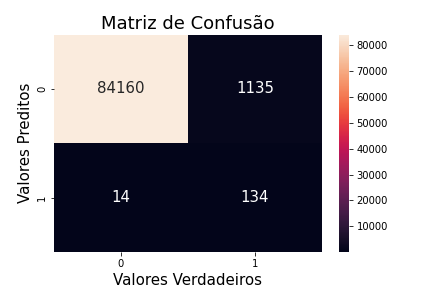
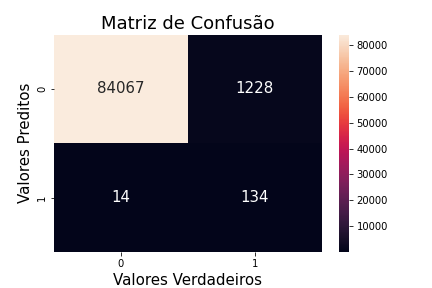

In [93]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Test',)
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      html += '<p>Recall Classe 0: {:1.4f}</p>\n'.format(results_dict['Recall Classe 0'])
      html += '<p>Recall Classe 1: {:1.4f}</p>\n'.format(results_dict['Recall Classe 1'])
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))